In [1]:
import warnings
warnings.filterwarnings('ignore')

- SibSp: タイタニック号に乗っている兄弟/配偶者の数
- Parch: タイタニック号に乗っている親/子供の数
- Cabin: キャビン番号
- Embarked: 乗船港

In [2]:
import pandas as pd

df = pd.read_csv("./data/input/train.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 最初に実行する前処理
df2 = df.copy(deep=True)

# 名前は分類に必要ないので削除
df2.drop(columns='Name', inplace=True)

# Cabinは Nanが多いので一旦削除
df2.drop(columns='Cabin', inplace=True)

# Ticketもバラバラなので一旦削除
# len(df["Ticket"].unique()) => 681
df2.drop(columns='Ticket', inplace=True)

# 男女をダミー変数化
# df2['Sex'].unique() => male , female
df2['Sex'] = df2['Sex'].apply(lambda sex: 1 if sex=="male" else 0)

# One-Hot-Encoding: Embarked
df2 = pd.get_dummies(df2)

# Nanは中央値に変換
df2.fillna(df2.median(), inplace=True)

df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0,0,1
888,1,1,0,19.0,0,0,30.0000,0,0,1
889,0,3,0,28.0,1,2,23.4500,0,0,1


In [25]:
# タイタニック号に乗っている家族の数
df2["Families"] = df2["SibSp"] + df2["Parch"]
# 独身, １世帯, それ以上 に分けてみる
df2["Families"] = df2["Families"].apply(lambda x: "s" if x == 0 else "m" if x < 3 else "l")

# One-Hot-Encoding: Families
df2 = pd.get_dummies(df2)

In [26]:
# 値を標準化して、それぞれの項目で平均値の差を見る
df3 = df2.copy(deep=True)
df3 = (df3 - df3.mean()) / df3.std()

df3[df3["Survived"] > 0].mean() - df3[df3["Survived"] < 0].mean()

Survived      2.055108
Pclass       -0.695615
Sex          -1.116646
Age          -0.133398
SibSp        -0.072592
Parch         0.167757
Fare          0.528793
Embarked_C    0.345752
Embarked_Q    0.007502
Embarked_S   -0.319899
Families_l   -0.061541
Families_m    0.489237
Families_s   -0.417941
dtype: float64

In [27]:
# そのままの値で、非生存者のみの統計値を閲覧
df2[df2["Survived"] == 0].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Families_l,Families_m,Families_s
count,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,0.852459,30.028233,0.553734,0.329690,22.117887,0.136612,0.085610,0.777778,0.109290,0.209472,0.681239
std,0.0,0.735805,0.354968,12.499986,1.288399,0.823166,31.388207,0.343751,0.280043,0.416119,0.312287,0.407303,0.466421
min,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,1.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,3.000000,1.000000,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.0,3.000000,1.000000,35.000000,1.000000,0.000000,26.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.0,3.000000,1.000000,74.000000,8.000000,6.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# そのままの値で、生存者のみの統計値を閲覧
df2[df2["Survived"] == 1].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Families_l,Families_m,Families_s
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,0.318713,28.291433,0.473684,0.464912,48.395408,0.271930,0.087719,0.634503,0.090643,0.432749,0.476608
std,0.0,0.863321,0.466660,13.764425,0.708688,0.771712,66.596998,0.445606,0.283301,0.482275,0.287522,0.496183,0.500184
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,12.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,2.000000,0.000000,28.000000,0.000000,0.000000,26.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.0,3.000000,1.000000,35.000000,1.000000,1.000000,57.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### n=1 分析
生存者の特徴
- Pclass: チケットのクラスは数値が低い(1st)
- Sex: 性別は女が多い
- Fare: 旅客運賃が高い

影響度は少なそうな特徴
- Embarked_C, S: 乗船港がCまたはS


### n=2 分析
生存者の特徴
- 1世帯の家族が最も多い

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# トレーニングデータを説明変数(X)と目的変数(y)に分割
X = df2[["Pclass", "Sex", "Fare", "Embarked_C", "Embarked_S", "Families_m", "Families_s"]]
y = df2[["Survived"]]

# 学習用データと検証用データに分割
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0)

# 標準化
std_scl = StandardScaler()
std_scl.fit(X_train)
X_train = std_scl.transform(X_train)
X_test = std_scl.transform(X_test)

# 学習・テスト
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)

grid_search.fit(X_train, y_train)
grid_search.score(X_test,y_test)

0.7873134328358209

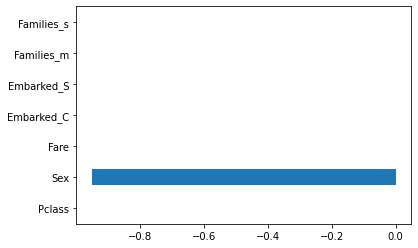

In [34]:
# 特徴量の確認
cols = ["Pclass", "Sex", "Fare", "Embarked_C", "Embarked_S", "Families_m", "Families_s"]
pd.Series(grid_search.best_estimator_.coef_[0], index=cols).plot(kind='barh');